In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import csv


#open the file
datapath='/Users/rachellee/Desktop/research/references/'
filename='flux_table_70um.txt'
data=np.loadtxt(datapath+filename)

#number is coloumn 0, flux is column 25
number=data[:,0]
flux=data[:,25]

In [7]:
#remove zeros in the flux
flux_new=[]
for i in range(len(flux)):
    if flux[i]!=0:
        flux_new.append(flux[i])

In [13]:
run=50
t=300
cadence=26

#run it 50 times
#start with function
def bursts1(full_time,size,probability,L_matrix,burst_matrix,change_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=26
    steps=t*cadence
    burst_prob=probability/cadence
    burst=burst_matrix
    L=L_matrix
    C=change_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob=random.random()
                if prob>burst_prob:
                    burst[j,i]=burst[j,i]
                    L[j,i]=cluster_mag[j]
                    C[j,i]=0
                if prob<=burst_prob:
                    burst[j,i:(30*cadence)+i]=np.nan
                    L[j,i:(30*cadence)+i]=cluster_mag[j]-5
                    C[j,i:(30*cadence)+i]=100
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
    #find the fraction at a time
    burst_num=[]
    fraction_val=0
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True:
                fraction_val+=1
        burst_num.append(fraction_val)
        fraction_val=0
        
    return burst_total,burst_num,burst,L,C

In [14]:
t_list_years=[200,220,220.5,221,221.5,222,222.5,223,223.5,224,224.5,225]
t_list_cadence=[int(i*2) for i in t_list_years]

## 50 stars

In [15]:
cluster_size50=50
steps=t*cadence
L50=np.zeros((cluster_size50,steps))
C50=np.zeros((cluster_size50,steps))
prob50=1/(100*30)

#1 bin
burst_total50=[]
burst_num50=[]
final_burst50=[]
final_L50=[]
final_C50=[]

for i in range(run):
    print(i)
    burst50=np.ones((cluster_size50,steps))
    L50=np.zeros((cluster_size50,steps))
    C50=np.zeros((cluster_size50,steps))
    values50=bursts1(t,50,prob50,L50,burst50,C50)
    burst_total50.append(values50[0])
    burst_num50.append(values50[1])
    final_burst50.append(values50[2])
    final_L50.append(values50[3])
    final_C50.append(values50[4])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [16]:
#write output files
values50_table=Table()
values50_table['burst_total']=burst_total50
values50_table['burst_number']=burst_num50 
ascii.write(values50_table,'/Users/rachellee/Downloads/data/cluster_size_change/values50_2week',\
            format='ecsv',overwrite=True)

np.save('/Users/rachellee/Downloads/data/cluster_size_change/burst50.npy',final_burst50)
np.save('/Users/rachellee/Downloads/data/cluster_size_change/L50.npy',final_L50)
np.save('/Users/rachellee/Downloads/data/cluster_size_change/C50.npy',final_C50)

In [1]:
cadence_num_bursts50=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_num_bursts50.append(burst_num50[i][j])

NameError: name 'np' is not defined

## 100 stars

In [19]:
cluster_size100=100
steps=t*cadence
L100=np.zeros((cluster_size100,steps))
C100=np.zeros((cluster_size100,steps))
prob100=1/(100*30)

#1 bin
burst_total100=[]
burst_num100=[]
final_burst100=[]
final_L100=[]
final_C100=[]

for i in range(run):
    print(i)
    burst100=np.ones((cluster_size100,steps))
    L100=np.zeros((cluster_size100,steps))
    C100=np.zeros((cluster_size100,steps))
    values100=bursts1(t,100,prob100,L100,burst100,C100)
    burst_total100.append(values100[0])
    burst_num100.append(values100[1])
    final_burst100.append(values100[2])
    final_L100.append(values100[3])
    final_C100.append(values100[4])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [20]:
#write output files
values100_table=Table()
values100_table['burst_total']=burst_total100
values100_table['burst_number']=burst_num100 
ascii.write(values100_table,'/Users/rachellee/Downloads/data/cluster_size_change/values100_2week',\
            format='ecsv',overwrite=True)

np.save('/Users/rachellee/Downloads/data/cluster_size_change/burst100.npy',final_burst100)
np.save('/Users/rachellee/Downloads/data/cluster_size_change/L100.npy',final_L100)
np.save('/Users/rachellee/Downloads/data/cluster_size_change/C100.npy',final_C100)

In [21]:
cadence_num_bursts100=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_num_bursts100.append(burst_num100[i][j])

## 500 stars

In [22]:
cluster_size500=500
steps=t*cadence
L500=np.zeros((cluster_size500,steps))
C500=np.zeros((cluster_size500,steps))
prob500=1/(100*30)

#1 bin
burst_total500=[]
burst_num500=[]
final_burst500=[]
final_L500=[]
final_C500=[]

for i in range(run):
    print(i)
    burst500=np.ones((cluster_size500,steps))
    L500=np.zeros((cluster_size500,steps))
    C500=np.zeros((cluster_size500,steps))
    values500=bursts1(t,500,prob500,L500,burst500,C500)
    burst_total500.append(values50[0])
    burst_num500.append(values500[1])
    final_burst500.append(values500[2])
    final_L500.append(values500[3])
    final_C500.append(values500[4])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [23]:
#write output files
values500_table=Table()
values500_table['burst_total']=burst_total500
values500_table['burst_number']=burst_num500 
ascii.write(values500_table,'/Users/rachellee/Downloads/data/cluster_size_change/values500_2week',\
            format='ecsv',overwrite=True)

np.save('/Users/rachellee/Downloads/data/cluster_size_change/burst500.npy',final_burst500)
np.save('/Users/rachellee/Downloads/data/cluster_size_change/L500.npy',final_L500)
np.save('/Users/rachellee/Downloads/data/cluster_size_change/C500.npy',final_C500)

In [24]:
cadence_num_bursts500=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_num_bursts500.append(burst_num500[i][j])

## 1000 stars

In [26]:
cluster_size1000=1000
steps=t*cadence
L1000=np.zeros((cluster_size1000,steps))
C1000=np.zeros((cluster_size1000,steps))
prob1000=1/(100*30)

#1 bin
burst_total1000=[]
burst_num1000=[]
final_burst1000=[]
final_L1000=[]
final_C1000=[]

for i in range(run):
    print(i)
    burst1000=np.ones((cluster_size1000,steps))
    L1000=np.zeros((cluster_size1000,steps))
    C1000=np.zeros((cluster_size1000,steps))
    values1000=bursts1(t,1000,prob1000,L1000,burst1000,C1000)
    burst_total1000.append(values1000[0])
    burst_num1000.append(values1000[1])
    final_burst1000.append(values1000[2])
    final_L1000.append(values1000[3])
    final_C1000.append(values1000[4])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [27]:
#write output files
values1000_table=Table()
values1000_table['burst_total']=burst_total1000
values1000_table['burst_number']=burst_num1000
ascii.write(values1000_table,'/Users/rachellee/Downloads/data/cluster_size_change/values1000_2week',\
            format='ecsv',overwrite=True)

np.save('/Users/rachellee/Downloads/data/cluster_size_change/burst1000.npy',final_burst1000)
np.save('/Users/rachellee/Downloads/data/cluster_size_change/L1000.npy',final_L1000)
np.save('/Users/rachellee/Downloads/data/cluster_size_change/C1000.npy',final_C1000)

In [28]:
cadence_num_bursts1000=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_num_bursts1000.append(burst_num1000[i][j])

## 2000 stars

In [29]:
cluster_size2000=2000
steps=t*cadence
L2000=np.zeros((cluster_size2000,steps))
C2000=np.zeros((cluster_size2000,steps))
prob2000=1/(100*30)

#1 bin
burst_total2000=[]
burst_num2000=[]
final_burst2000=[]
final_L2000=[]
final_C2000=[]

for i in range(run):
    print(i)
    burst2000=np.ones((cluster_size2000,steps))
    L2000=np.zeros((cluster_size2000,steps))
    C2000=np.zeros((cluster_size2000,steps))
    values2000=bursts1(t,2000,prob2000,L2000,burst2000,C2000)
    burst_total2000.append(values2000[0])
    burst_num2000.append(values2000[1])
    final_burst2000.append(values2000[2])
    final_L2000.append(values2000[3])
    final_C2000.append(values2000[4])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [30]:
#write output files
values2000_table=Table()
values2000_table['burst_total']=burst_total2000
values2000_table['burst_number']=burst_num2000
ascii.write(values2000_table,'/Users/rachellee/Downloads/data/cluster_size_change/values2000_2week',\
            format='ecsv',overwrite=True)

np.save('/Users/rachellee/Downloads/data/cluster_size_change/burst2000.npy',final_burst2000)
np.save('/Users/rachellee/Downloads/data/cluster_size_change/L2000.npy',final_L2000)
np.save('/Users/rachellee/Downloads/data/cluster_size_change/C2000.npy',final_C2000)

In [31]:
cadence_num_bursts2000=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_num_bursts2000.append(burst_num2000[i][j])

## 5000 stars

In [32]:
cluster_size5000=5000
steps=t*cadence
L5000=np.zeros((cluster_size5000,steps))
C5000=np.zeros((cluster_size5000,steps))
prob5000=1/(100*30)

#1 bin
burst_total5000=[]
burst_num5000=[]
final_burst5000=[]
final_L5000=[]
final_C5000=[]

for i in range(run):
    print(i)
    burst5000=np.ones((cluster_size5000,steps))
    L5000=np.zeros((cluster_size5000,steps))
    C5000=np.zeros((cluster_size5000,steps))
    values5000=bursts1(t,5000,prob5000,L5000,burst5000,C5000)
    burst_total5000.append(values500[0])
    burst_num5000.append(values5000[1])
    final_burst5000.append(values5000[2])
    final_L5000.append(values5000[3])
    final_C5000.append(values5000[4])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [33]:
#write output files
values5000_table=Table()
values5000_table['burst_total']=burst_total5000
values5000_table['burst_number']=burst_num5000
ascii.write(values5000_table,'/Users/rachellee/Downloads/data/cluster_size_change/values5000_2week',\
            format='ecsv',overwrite=True)

np.save('/Users/rachellee/Downloads/data/cluster_size_change/burst5000.npy',final_burst5000)
np.save('/Users/rachellee/Downloads/data/cluster_size_change/L5000.npy',final_L5000)
np.save('/Users/rachellee/Downloads/data/cluster_size_change/C5000.npy',final_C5000)

In [34]:
cadence_num_bursts5000=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_num_bursts5000.append(burst_num5000[i][j])

In [78]:
#calculate the mean of each time step
t_list_years=[200,220,220.5,221,221.5,222,222.5,223,223.5,224,224.5,225]
t_list_cadence=[int(i*2) for i in t_list_years]

t_list_years=[200,220,220.5,221,221.5,222,222.5,223,223.5,224,224.5,225]
t_list_cadence=[int(i*2) for i in t_list_years]

In [79]:
#find mean and std of each star cluster at the cadence times
mean_frac50=np.mean(cadence_frac_bursts50)
std_frac50=np.std(cadence_frac_bursts50)
mean_frac100=np.mean(cadence_frac_bursts100)
std_frac100=np.std(cadence_frac_bursts100)
mean_frac500=np.mean(cadence_frac_bursts500)
std_frac500=np.std(cadence_frac_bursts500)
mean_frac1000=np.mean(cadence_frac_bursts1000)
std_frac1000=np.std(cadence_frac_bursts1000)
mean_frac2000=np.mean(cadence_frac_bursts2000)
std_frac2000=np.std(cadence_frac_bursts2000)
mean_frac5000=np.mean(cadence_frac_bursts5000)
std_frac5000=np.std(cadence_frac_bursts5000)

#put them in a list
mean_frac=[mean_frac50,mean_frac100,mean_frac500,mean_frac1000,mean_frac2000,mean_frac5000]
std_frac=[std_frac50,std_frac100,std_frac500,std_frac1000,std_frac2000,std_frac5000]
number=[50,100,500,1000,2000,5000]

Text(0.5, 1.0, 'Mean Fraction of Stars with 100x Burst for Different Cluster Sizes')

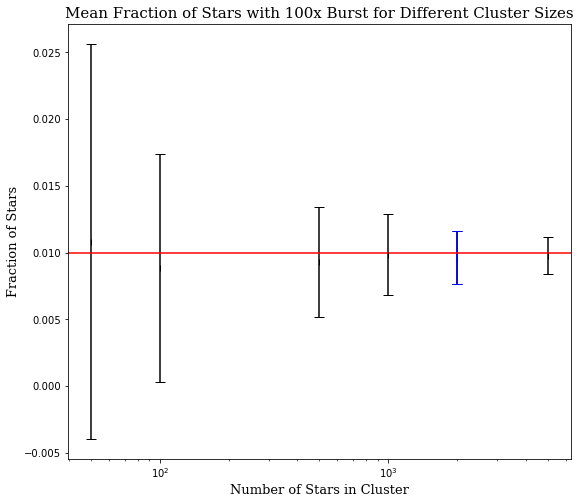

In [80]:
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
x=[2000]
ax.errorbar(number,mean_frac,yerr=std_frac,fmt='|',capsize=5,color='black')
ax.errorbar(x,mean_frac2000,yerr=std_frac2000,fmt='|',capsize=5,color='blue')
ax.axhline(0.01,color='red')
ax.set_xscale('log')
ax.set_xlabel('Number of Stars in Cluster',font='serif',fontsize=13)
ax.set_ylabel('Fraction of Stars',font='serif',fontsize=13)
ax.set_title('Mean Fraction of Stars with 100x Burst for Different Cluster Sizes',font='serif',fontsize=15)

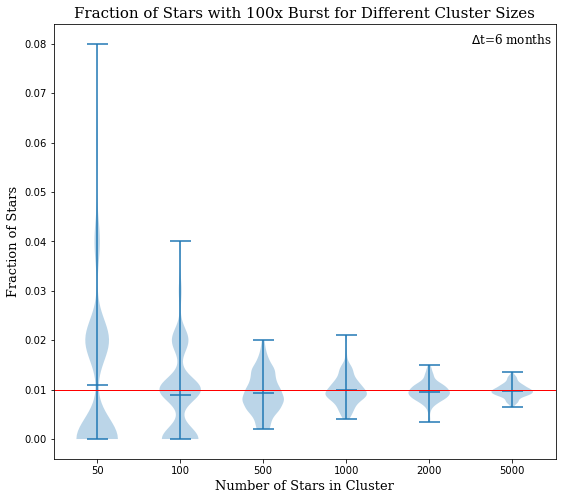

In [87]:
data=[cadence_frac_bursts50,cadence_frac_bursts100,cadence_frac_bursts500,cadence_frac_bursts1000,\
      cadence_frac_bursts2000,cadence_frac_bursts5000]
labels=[50,100,500,1000,2000,5000]
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
ax.violinplot(data,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.axhline(0.01,color='red',lw=1)
ax.text(5.5,0.080,r'$\Delta$t=6 months',font='serif',fontsize=12)
plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])
ax.set_xlabel('Number of Stars in Cluster',font='serif',fontsize=13)
ax.set_ylabel('Fraction of Stars',font='serif',fontsize=13)
ax.set_title('Fraction of Stars with 100x Burst for Different Cluster Sizes',font='serif',fontsize=15)
plt.plot()
plt.savefig('/Users/rachellee/Desktop/research/figs/SizeChange/violinplots/fraction/violin_plot_50run_clustersize_fraction_6month.jpeg',dpi=300,bbox_inches='tight')

In [83]:
data_num=[cadence_num_bursts50,cadence_num_bursts100,cadence_num_bursts500,cadence_num_bursts1000,\
         cadence_num_bursts2000,cadence_num_bursts5000]

cadence_new50=[]
cadence_new100=[]
cadence_new500=[]
cadence_new1000=[]
cadence_new2000=[]
cadence_new5000=[]
for i in range(len(cadence_num_bursts50)):
    #if cadence_num_bursts50[i]==0:
    #    cadence_new50.append(0.1)
    if cadence_num_bursts50[i]!=0:
        cadence_new50.append(cadence_num_bursts50[i])
        
for i in range(len(cadence_num_bursts100)):
    #if cadence_num_bursts100[i]==0:
    #    cadence_new100.append(0.1)
    if cadence_num_bursts100[i]!=0:
        cadence_new100.append(cadence_num_bursts100[i])
        
for i in range(len(cadence_num_bursts500)):
    #if cadence_num_bursts500[i]==0:
    #    cadence_new500.append(0.1)
    if cadence_num_bursts500[i]!=0:
        cadence_new500.append(cadence_num_bursts500[i])
        
for i in range(len(cadence_num_bursts1000)):
    #if cadence_num_bursts1000[i]==0:
    #    cadence_new1000.append(0.1)
    if cadence_num_bursts1000[i]!=0:
        cadence_new1000.append(cadence_num_bursts1000[i])
        
for i in range(len(cadence_num_bursts2000)):
    #if cadence_num_bursts2000[i]==0:
    #    cadence_new2000.append(0.1)
    if cadence_num_bursts2000[i]!=0:
        cadence_new2000.append(cadence_num_bursts2000[i])

for i in range(len(cadence_num_bursts5000)):
    #if cadence_num_bursts5000[i]==0:
    #    cadence_new5000.append(0.1)
    if cadence_num_bursts5000[i]!=0:
        cadence_new5000.append(cadence_num_bursts5000[i])
        
data_num_log=[cadence_new50,cadence_new100,cadence_new500,cadence_new1000,cadence_new2000,cadence_new5000]

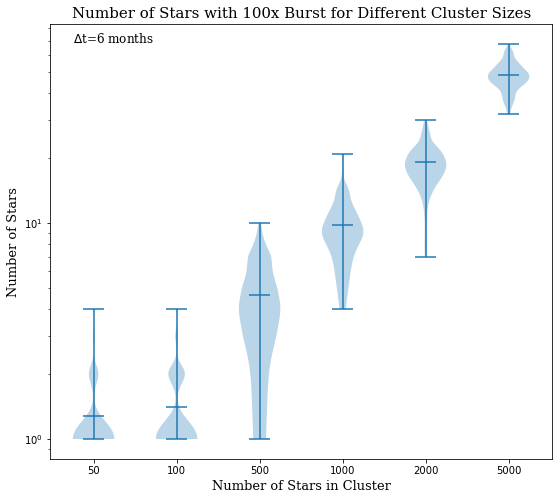

In [88]:
data_num=[cadence_num_bursts50,cadence_num_bursts100,cadence_num_bursts500,cadence_num_bursts1000,\
         cadence_num_bursts2000,cadence_num_bursts5000]

labels=[50,100,500,1000,2000,5000]
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
ax.violinplot(data_num_log,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.text(0.75,69,r'$\Delta$t=6 months',font='serif',fontsize=12)
plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])
ax.set_xlabel('Number of Stars in Cluster',font='serif',fontsize=13)
ax.set_ylabel('Number of Stars',font='serif',fontsize=13)
ax.set_title('Number of Stars with 100x Burst for Different Cluster Sizes',font='serif',fontsize=15)
plt.yscale('log')
plt.plot()
plt.savefig('/Users/rachellee/Desktop/research/figs/SizeChange/violinplots/number/violin_plot_50run_clustersize_number_6month_log.jpeg')

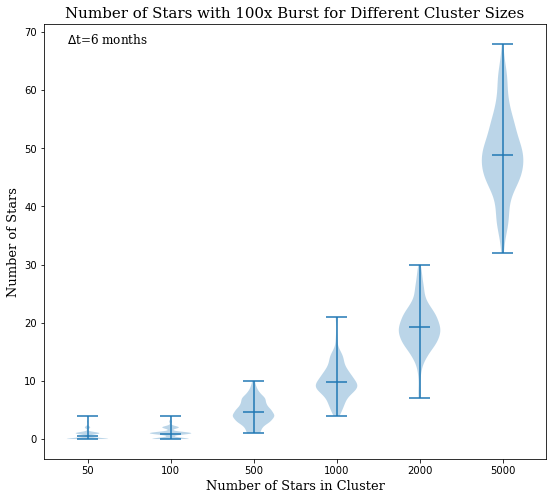

In [90]:
data_num=[cadence_num_bursts50,cadence_num_bursts100,cadence_num_bursts500,cadence_num_bursts1000,\
         cadence_num_bursts2000,cadence_num_bursts5000]

labels=[50,100,500,1000,2000,5000]
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
ax.violinplot(data_num,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
ax.text(0.75,68,r'$\Delta$t=6 months',font='serif',fontsize=12)
plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])
ax.set_xlabel('Number of Stars in Cluster',font='serif',fontsize=13)
ax.set_ylabel('Number of Stars',font='serif',fontsize=13)
ax.set_title('Number of Stars with 100x Burst for Different Cluster Sizes',font='serif',fontsize=15)
plt.plot()
plt.savefig('/Users/rachellee/Desktop/research/figs/SizeChange/violinplots/number/violin_plot_50run_clustersize_number_6month_normal.jpeg')

In [108]:
values50table_2week=ascii.read('/Users/rachellee/Desktop/research/data/cluster_size_change/values50_2week')
burst_total50_2week=values50table_2week['burst_total'] 
burst_fraction50_2week=values50table_2week['burst_number'] 
fraction50_2week=values50table_2week['burst_fraction']

values100table_2week=ascii.read('/Users/rachellee/Desktop/research/data/cluster_size_change/values100_2week')
burst_total100_2week=values100table_2week['burst_total'] 
burst_fraction100_2week=values100table_2week['burst_number'] 
fraction100_2week=values100table_2week['burst_fraction']

values500table_2week=ascii.read('/Users/rachellee/Desktop/research/data/cluster_size_change/values500_2week')
burst_total500_2week=values500table_2week['burst_total'] 
burst_fraction500_2week=values500table_2week['burst_number'] 
fraction500_2week=values500table_2week['burst_fraction']

values1000table_2week=ascii.read('/Users/rachellee/Desktop/research/data/cluster_size_change/values1000_2week')
burst_total1000_2week=values1000table_2week['burst_total'] 
burst_fraction1000_2week=values1000table_2week['burst_number'] 
fraction1000_2week=values1000table_2week['burst_fraction']

values2000table_2week=ascii.read('/Users/rachellee/Desktop/research/data/cluster_size_change/values2000_2week')
burst_total2000_2week=values2000table_2week['burst_total'] 
burst_fraction2000_2week=values2000table_2week['burst_number'] 
fraction2000_2week=values2000table_2week['burst_fraction']

values5000table_2week=ascii.read('/Users/rachellee/Desktop/research/data/cluster_size_change/values5000_2week')
burst_total5000_2week=values5000table_2week['burst_total'] 
burst_fraction5000_2week=values5000table_2week['burst_number'] 
fraction5000_2week=values5000table_2week['burst_fraction']

In [112]:
t_list_years=[200,220,220.5,221,221.5,222,222.5,223,223.5,224,224.5,225]
t_list_cadence=[int(i*26) for i in t_list_years]

In [113]:
cadence_frac_bursts50_2week=[]
cadence_num_bursts50_2week=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_frac_bursts50_2week.append(fraction50_2week[i][j])
        cadence_num_bursts50_2week.append(burst_fraction50_2week[i][j])
        
cadence_frac_bursts100_2week=[]
cadence_num_bursts100_2week=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_frac_bursts100_2week.append(fraction100_2week[i][j])
        cadence_num_bursts100_2week.append(burst_fraction100_2week[i][j])
        
cadence_frac_bursts500_2week=[]
cadence_num_bursts500_2week=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_frac_bursts500_2week.append(fraction500_2week[i][j])
        cadence_num_bursts500_2week.append(burst_fraction500_2week[i][j])
        
cadence_frac_bursts1000_2week=[]
cadence_num_bursts1000_2week=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_frac_bursts1000_2week.append(fraction1000_2week[i][j])
        cadence_num_bursts1000_2week.append(burst_fraction1000_2week[i][j])
        
cadence_frac_bursts2000_2week=[]
cadence_num_bursts2000_2week=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_frac_bursts2000_2week.append(fraction2000_2week[i][j])
        cadence_num_bursts2000_2week.append(burst_fraction2000_2week[i][j])

cadence_frac_bursts5000_2week=[]
cadence_num_bursts5000_2week=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_frac_bursts5000_2week.append(fraction5000_2week[i][j])
        cadence_num_bursts5000_2week.append(burst_fraction5000_2week[i][j])

print(cadence_num_bursts5000_2week)

[40, 43, 42, 42, 42, 41, 42, 44, 44, 44, 44, 44, 57, 48, 48, 47, 48, 46, 46, 46, 47, 48, 49, 50, 56, 41, 40, 39, 37, 37, 38, 37, 39, 41, 38, 38, 46, 51, 52, 53, 51, 52, 52, 54, 55, 55, 54, 54, 35, 48, 48, 50, 49, 48, 47, 46, 48, 47, 46, 46, 51, 43, 44, 46, 46, 46, 48, 49, 47, 46, 45, 44, 58, 69, 70, 70, 68, 67, 70, 67, 69, 69, 68, 67, 55, 49, 48, 49, 48, 48, 46, 48, 48, 48, 49, 47, 51, 44, 43, 42, 40, 40, 40, 41, 41, 41, 39, 39, 47, 46, 48, 47, 47, 48, 49, 50, 52, 52, 51, 48, 47, 41, 41, 41, 42, 45, 43, 43, 44, 44, 43, 41, 47, 55, 55, 55, 56, 56, 55, 56, 56, 57, 56, 57, 44, 34, 34, 37, 35, 35, 36, 35, 34, 34, 35, 36, 54, 60, 63, 63, 62, 62, 59, 62, 63, 63, 65, 64, 52, 41, 39, 37, 36, 36, 37, 38, 40, 40, 41, 40, 45, 42, 42, 43, 43, 43, 43, 42, 41, 41, 41, 40, 45, 45, 47, 47, 47, 49, 49, 48, 50, 50, 50, 49, 35, 48, 47, 48, 48, 49, 51, 52, 52, 53, 57, 58, 50, 60, 58, 58, 58, 58, 58, 57, 57, 58, 58, 57, 53, 47, 49, 50, 51, 49, 50, 50, 49, 49, 47, 47, 42, 49, 47, 48, 47, 45, 44, 44, 43, 43,

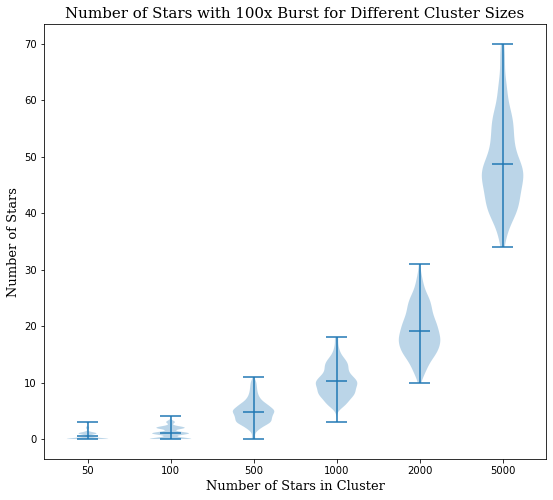

In [115]:
data_num_2week=[cadence_num_bursts50_2week,cadence_num_bursts100_2week,cadence_num_bursts500_2week,\
                cadence_num_bursts1000_2week,cadence_num_bursts2000_2week,cadence_num_bursts5000_2week]

labels=[50,100,500,1000,2000,5000]
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
ax.violinplot(data_num_2week,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])
ax.set_xlabel('Number of Stars in Cluster',font='serif',fontsize=13)
ax.set_ylabel('Number of Stars',font='serif',fontsize=13)
ax.set_title('Number of Stars with 100x Burst for Different Cluster Sizes',font='serif',fontsize=15)
plt.plot()
plt.savefig('/Users/rachellee/Desktop/research/figs/SizeChange/violinplots/number/violin_plot_50run_clustersize_number_2week_normal.jpeg',dpi=300,bbox_inches='tight')